<a href="https://colab.research.google.com/github/Tsukkei/CCDATSCL_EXERCISES_COM221/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [39]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'corona-virus-report' dataset.
Path to dataset files: /kaggle/input/corona-virus-report


In [40]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [42]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [43]:
df.query("`Country/Region` == 'Philippines'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
180,NaN,Philippines,12.879721,121.774017,2020-01-22,0,0,0,0,Western Pacific
441,NaN,Philippines,12.879721,121.774017,2020-01-23,0,0,0,0,Western Pacific
702,NaN,Philippines,12.879721,121.774017,2020-01-24,0,0,0,0,Western Pacific
963,NaN,Philippines,12.879721,121.774017,2020-01-25,0,0,0,0,Western Pacific
1224,NaN,Philippines,12.879721,121.774017,2020-01-26,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47943,NaN,Philippines,12.879721,121.774017,2020-07-23,74390,1871,24383,48136,Western Pacific
48204,NaN,Philippines,12.879721,121.774017,2020-07-24,76444,1879,24502,50063,Western Pacific
48465,NaN,Philippines,12.879721,121.774017,2020-07-25,78412,1897,25752,50763,Western Pacific
48726,NaN,Philippines,12.879721,121.774017,2020-07-26,80448,1932,26110,52406,Western Pacific


## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

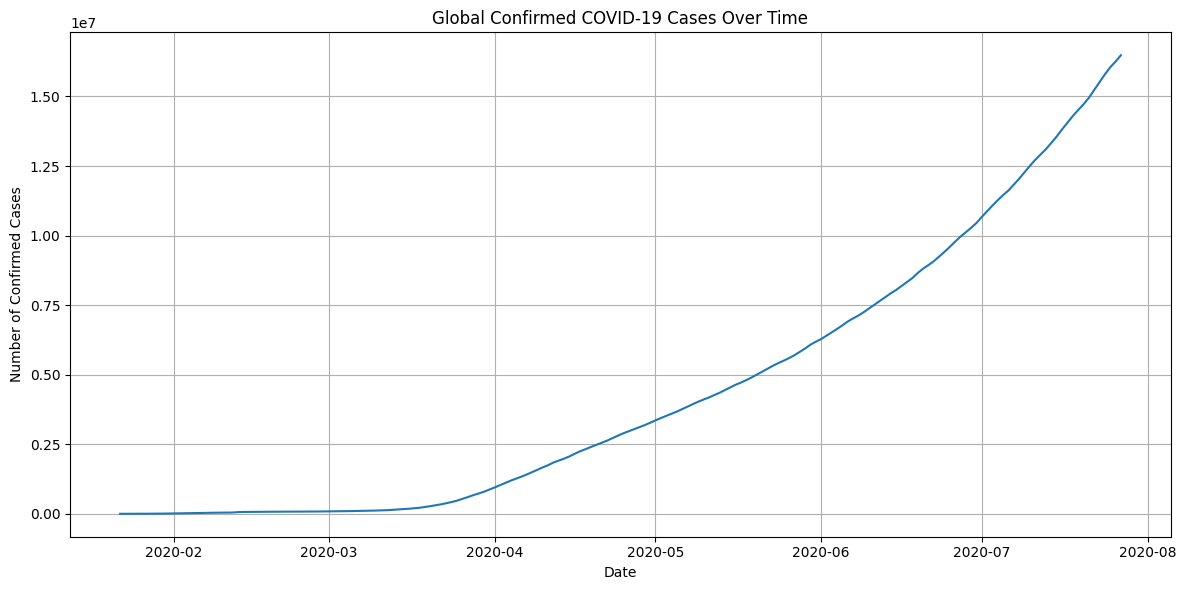

In [44]:
# put your answer here

import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by Date for global confirmed cases
global_confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()

# Convert 'Date' column to datetime objects for proper plotting
global_confirmed['Date'] = pd.to_datetime(global_confirmed['Date'])

# Line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=global_confirmed)
plt.title('Global Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

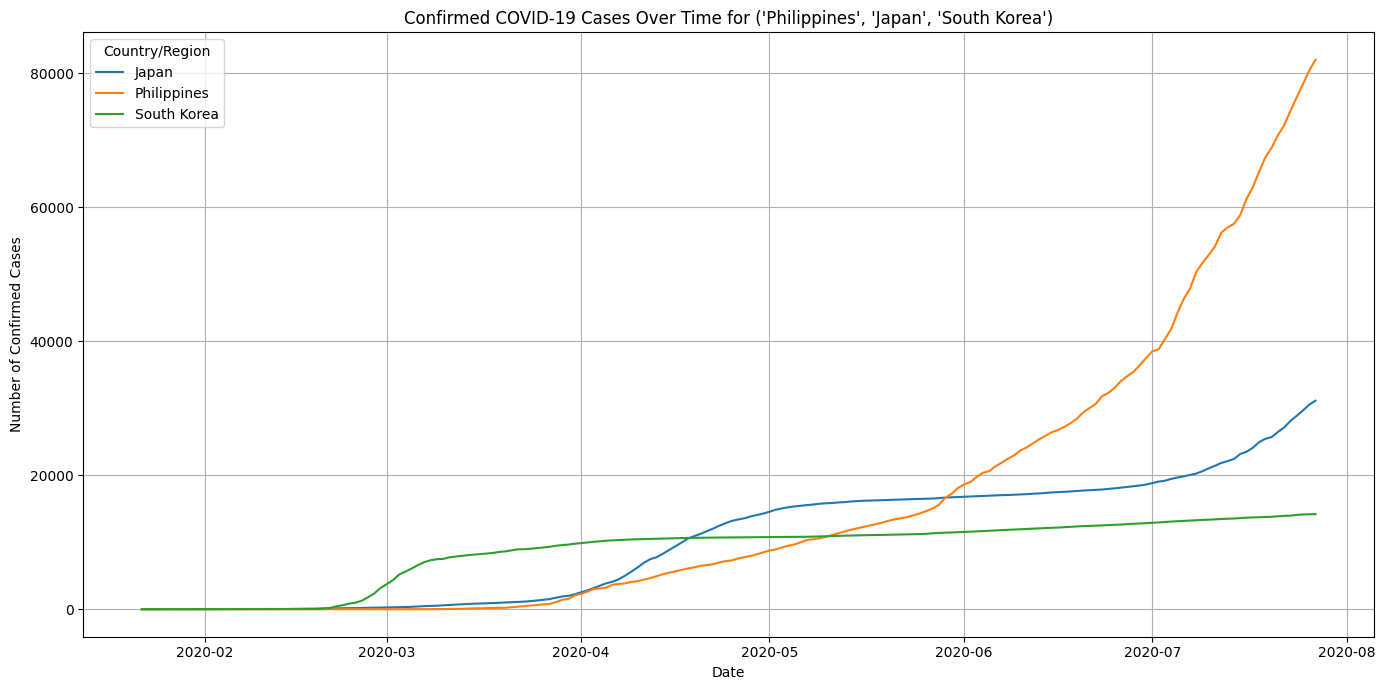

In [45]:
# put your answer here

import matplotlib.pyplot as plt
import seaborn as sns

# Select three countries
selected_countries = 'Philippines', 'Japan', 'South Korea'

# Filter the DataFrame for the selected countries
country_cases = df[df['Country/Region'].isin(selected_countries)]

# Aggregate data by Date and Country/Region for confirmed cases
country_cases_agg = country_cases.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()

# Convert 'Date' column to datetime objects
country_cases_agg['Date'] = pd.to_datetime(country_cases_agg['Date'])

# Line chart
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Confirmed', hue='Country/Region', data=country_cases_agg)
plt.title(f'Confirmed COVID-19 Cases Over Time for {selected_countries}')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.grid(True)
plt.legend(title='Country/Region')
plt.tight_layout()
plt.show()

3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

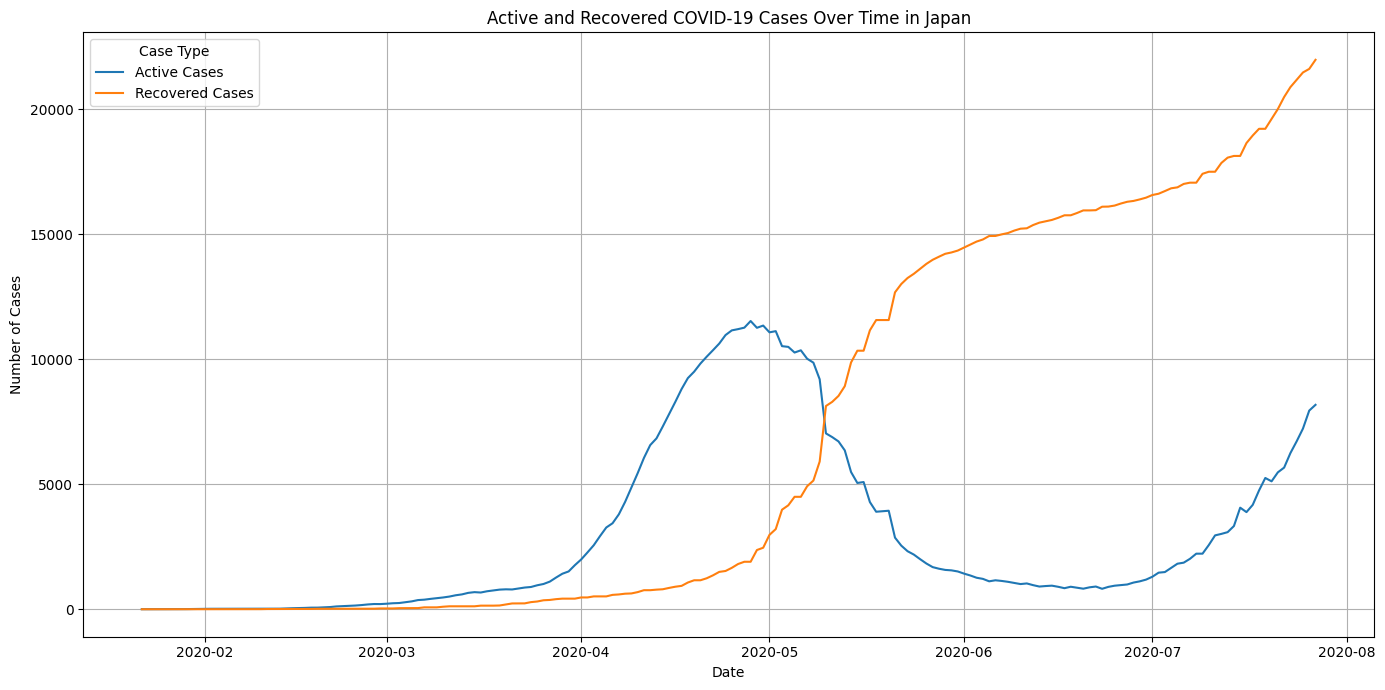

In [46]:
# put your answer here

import matplotlib.pyplot as plt
import seaborn as sns

# Select a country
selected_country = 'Japan'

# Filter the DataFrame for the selected country
country_data = df[df['Country/Region'] == selected_country].copy()

# Convert 'Date' column to datetime objects
country_data['Date'] = pd.to_datetime(country_data['Date'])

# Line chart for Active and Recovered cases
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Active', data=country_data, label='Active Cases')
sns.lineplot(x='Date', y='Recovered', data=country_data, label='Recovered Cases')

plt.title(f'Active and Recovered COVID-19 Cases Over Time in {selected_country}')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend(title='Case Type')
plt.tight_layout()
plt.show()

## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

/tmp/ipython-input-4155568085.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries, palette='viridis')


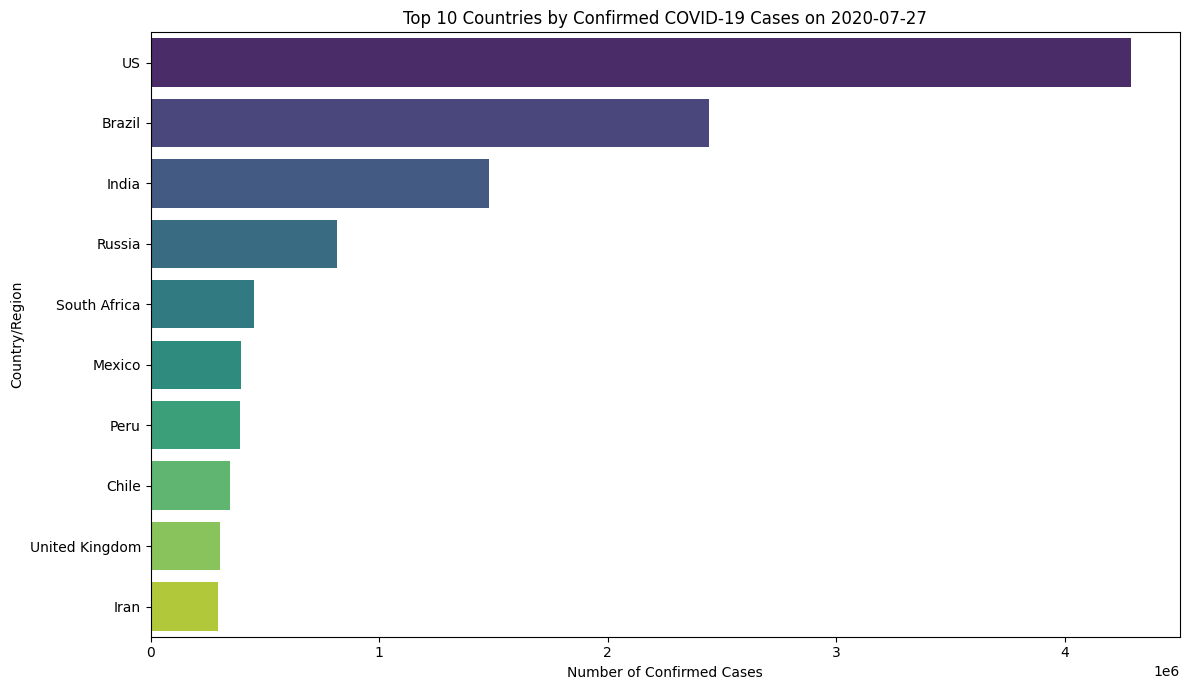

In [47]:
# put your answer here

import matplotlib.pyplot as plt
import seaborn as sns

# Get the most recent date in the dataset
latest_date = df['Date'].max()

# Filter data for the latest date
df_latest_date = df[df['Date'] == latest_date]

# Aggregate confirmed cases by country for the latest date
country_confirmed = df_latest_date.groupby('Country/Region')['Confirmed'].sum().reset_index()

# Sort and get the top 10 countries
top_10_countries = country_confirmed.sort_values(by='Confirmed', ascending=False).head(10)

# Bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries, palette='viridis')
plt.title(f'Top 10 Countries by Confirmed COVID-19 Cases on {latest_date}')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Country/Region')
plt.tight_layout()
plt.show()

5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

/tmp/ipython-input-259786993.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='WHO Region', data=region_confirmed, palette='magma')


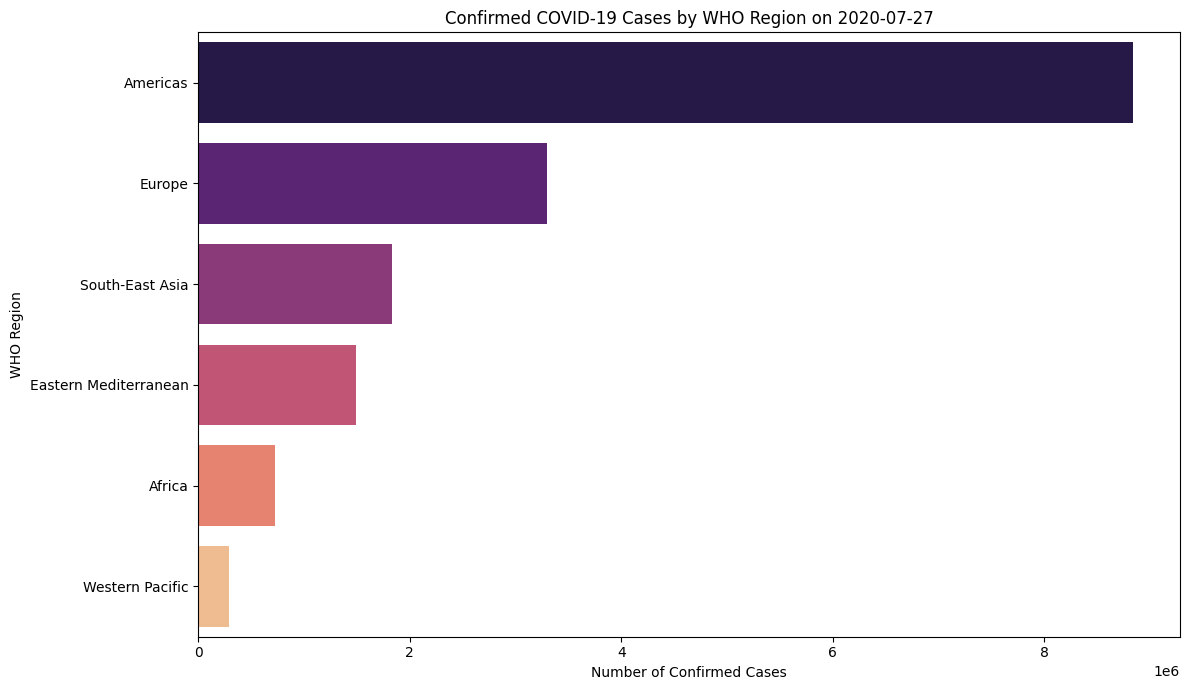

In [48]:
# put your answer here

import matplotlib.pyplot as plt
import seaborn as sns

# Get the most recent date in the dataset
latest_date = df['Date'].max()

# Filter data for the latest date
df_latest_date = df[df['Date'] == latest_date]

# Aggregate confirmed cases by WHO Region for the latest date
region_confirmed = df_latest_date.groupby('WHO Region')['Confirmed'].sum().reset_index()

# Sort by confirmed cases for better visualization
region_confirmed = region_confirmed.sort_values(by='Confirmed', ascending=False)

# Bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Confirmed', y='WHO Region', data=region_confirmed, palette='magma')
plt.title(f'Confirmed COVID-19 Cases by WHO Region on {latest_date}')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('WHO Region')
plt.tight_layout()
plt.show()

## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

In [49]:
# put your answer here

import folium

# Get the most recent date in the dataset
latest_date = df['Date'].max()

# Filter data for the latest date
df_latest_date = df[df['Date'] == latest_date]

# Aggregate confirmed cases by Latitude, Longitude, and Country/Region for the latest date
# This is to avoid multiple markers for the same location if a country has provinces/states
country_geo_data = df_latest_date.groupby(['Country/Region', 'Lat', 'Long']).agg(
    Confirmed=('Confirmed', 'sum')
).reset_index()

# Base map centered roughly in the middle of the world
m = folium.Map(location=[20, 0], zoom_start=2)

# Add circle markers for each location
for index, row in country_geo_data.iterrows():
    if row['Confirmed'] > 0: # Only plot locations with confirmed cases
        folium.CircleMarker(
            location=[row['Lat'], row['Long']],
            radius=min(float(row['Confirmed']) / 20000, 20), # Scale radius based on confirmed cases, cap at 20
            popup=f"<b>Country:</b> {row['Country/Region']}<br><b>Confirmed:</b> {row['Confirmed']:,}",
            color='red',
            fill=True,
            fill_color='red'
        ).add_to(m)

# Display the map
m

7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

In [50]:
# put your answer here

import folium

# Select a WHO Region (e.g., 'Europe', 'Americas', 'Western Pacific', etc.)
selected_who_region = 'Europe'

# Get the most recent date in the dataset
latest_date = df['Date'].max()

# Filter data for the latest date and the selected WHO Region
df_region_data = df[(df['Date'] == latest_date) & (df['WHO Region'] == selected_who_region)]

# Aggregate confirmed cases by Latitude, Longitude, and Country/Region for the selected region
region_geo_data = df_region_data.groupby(['Country/Region', 'Lat', 'Long']).agg(
    Confirmed=('Confirmed', 'sum')
).reset_index()

# Base map centered on the average latitude and longitude of the selected region
# Fallback to a general center if the region_geo_data is empty
if not region_geo_data.empty:
    center_lat = region_geo_data['Lat'].mean()
    center_long = region_geo_data['Long'].mean()
    m_region = folium.Map(location=[center_lat, center_long], zoom_start=4)
else:
    m_region = folium.Map(location=[50, 10], zoom_start=3) # Default center for Europe if no data

# Add circle markers for each location in the region
for index, row in region_geo_data.iterrows():
    if row['Confirmed'] > 0: # Only plot locations with confirmed cases
        folium.CircleMarker(
            location=[row['Lat'], row['Long']],
            radius=min(float(row['Confirmed']) / 50000, 25), # Scale radius based on confirmed cases
            popup=f"<b>Country:</b> {row['Country/Region']}<br><b>Confirmed:</b> {row['Confirmed']:,}",
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(m_region)

# Display the map
m_region